In [1]:
if __name__=="__main__":
	import sys
	sys.path.append('/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/Scripts')

In [2]:
import numpy as np
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import tifffile as tiff
from src.SMT_Analysis_BP.helpers.Analysis_functions import *
from src.SMT_Analysis_BP.helpers.blob_detection import *
from skimage import io
#import curve_fit 
from scipy.optimize import curve_fit
import src.SMT_Analysis_BP.helpers.fbm_utility as fbm_utility
import src.SMT_Analysis_BP.helpers.simulate_foci as simulate_foci
import src.SMT_Analysis_BP.helpers.simulate_cells as simulate_cells
import src.SMT_Analysis_BP.helpers.SMT_converters as smt
import src.SMT_Analysis_BP.helpers.smallestenclosingcircle as smallestenclosingcircle
#import convexhull
from scipy.spatial import ConvexHull
from sklearn.cluster import DBSCAN

In [3]:
SAVE = False

In [4]:
initial_dict = {
    "initial_centers":np.array([[100,100]]),
    "initial_scale": np.array([2]),
    "diffusion_coefficient": np.array([0]),
    "hurst_exponent": np.array([0.2])  
}
cell_parms = {
    "diffusion_coefficients":np.array(list(0.45*np.ones(1000))),
    "initials": initial_dict,
    "num_tracks":1000,
    "track_type":"fbm",
    "hursts":np.array(list(0.2*np.ones(1000))),
    "dims":(200,200),
    "movie_frames":500,
    "cell_space":np.array([80,120,90,105])
}     
global_sim_params = {
    "track_length_mean":1,
    "track_distribution":"constant",
    "exposure_time":20,#ms same as frame_time
    "base_noise":140,
    "point_intensity":20,
    "psf_sigma":1.,
    "frame_time":20,#ms
    "pixel_size":130,
    "axial_function":"exponential",
    "density_dif": 5
}
#for convenience make a seperate dictionary for the true center and scale values
true_parms = {
    "true_centers":initial_dict["initial_centers"],
    "true_scales":initial_dict["initial_scale"]
}


In [5]:
#lets make a utility function to create all points in the cell using the points per frame dict
def create_all_points(points_per_frame_dict):
    all_points = []
    for frame in points_per_frame_dict.keys():
        #only take the x,y coordinates
        if len(points_per_frame_dict[frame])>0:
            all_points.extend(np.array(points_per_frame_dict[frame])[:,0:2])
    return np.array(all_points)

#lets make a utility function to perform DBSCAN on the points per frame dict using supplied parameters D and minPts.
def perform_DBSCAN(points_per_frame_dict,D,minPts):
    all_points = create_all_points(points_per_frame_dict)
    db = DBSCAN(eps=D, min_samples=minPts).fit(all_points)
    labels = db.labels_
    return labels



Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-07-24 15:55:46.783910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-24 15:55:46.784038: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


{(0.1, 1): {'num_clusters': 956, 'cluster_center_error': 0.21602671512809307, 'cluster_scale_error': 0.964894985355509}, (0.1, 2): {'num_clusters': 39, 'cluster_center_error': 0.37339849726564167, 'cluster_scale_error': 0.964894985355509}, (0.1, 3): {'num_clusters': 6, 'cluster_center_error': 0.984883492747389, 'cluster_scale_error': 0.964894985355509}, (0.1, 4): {'num_clusters': 2, 'cluster_center_error': 1.4412594980346651, 'cluster_scale_error': 0.964894985355509}, (0.1, 5): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 6): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 7): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 8): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 9): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 10): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_

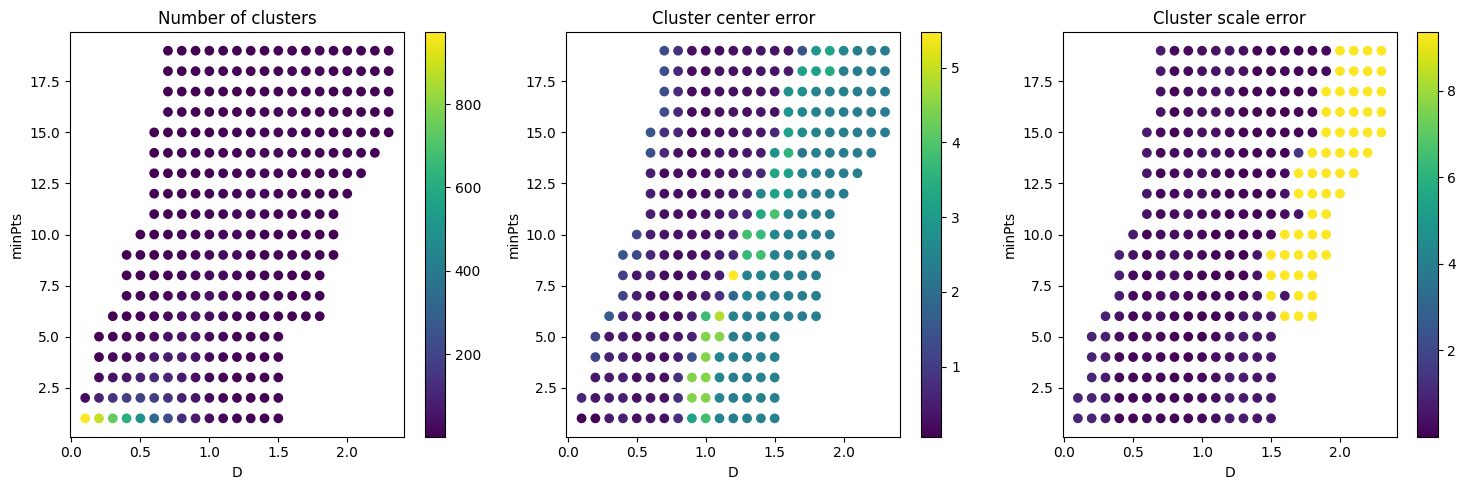

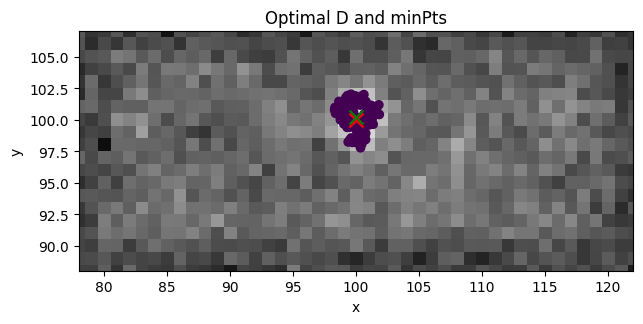

{(0.1, 1): {'num_clusters': 967, 'cluster_center_error': 0.3187454624199386, 'cluster_scale_error': 0.9313267506835272}, (0.1, 2): {'num_clusters': 28, 'cluster_center_error': 0.4192629130971843, 'cluster_scale_error': 0.9313267506835272}, (0.1, 3): {'num_clusters': 3, 'cluster_center_error': 0.5228708296143448, 'cluster_scale_error': 0.9313267506835272}, (0.1, 4): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 5): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 6): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 7): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 8): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 9): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 10): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 11): 

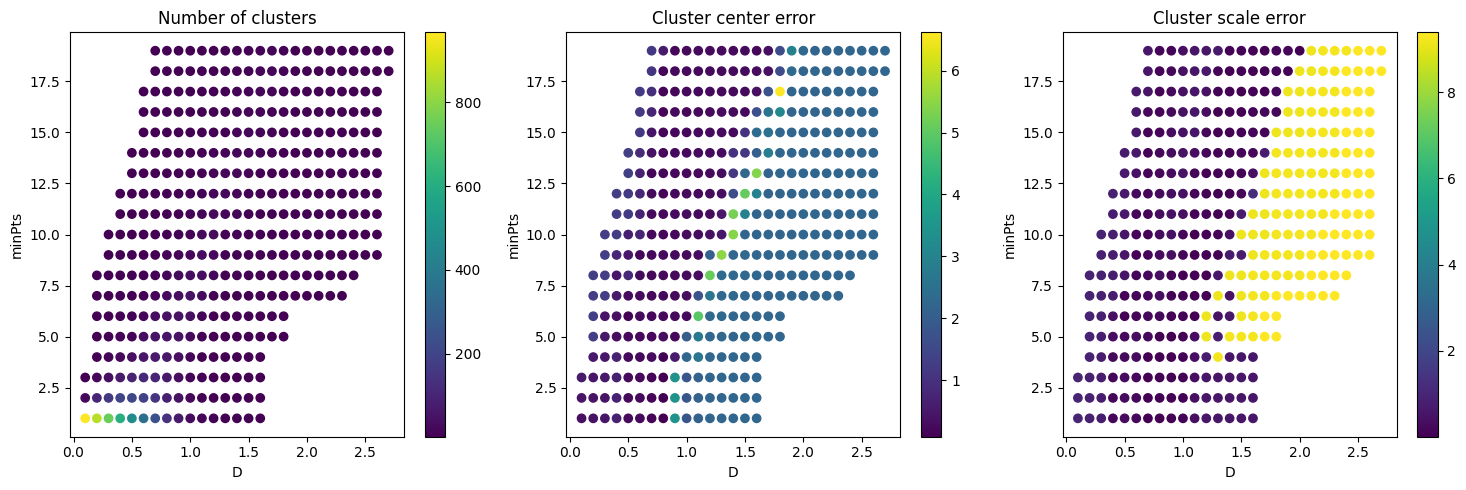

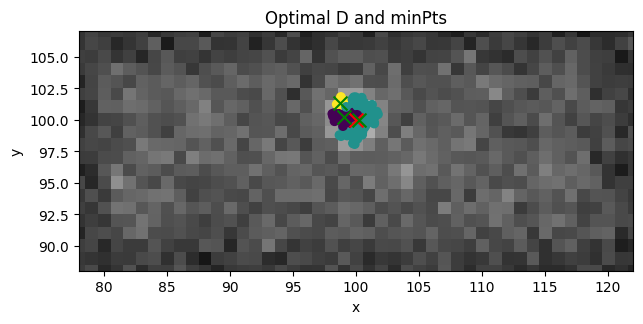

{(0.1, 1): {'num_clusters': 968, 'cluster_center_error': 0.39830847247708123, 'cluster_scale_error': 0.9552263143151148}, (0.1, 2): {'num_clusters': 31, 'cluster_center_error': 1.1766933895345248, 'cluster_scale_error': 0.9552263143151148}, (0.1, 3): {'num_clusters': 3, 'cluster_center_error': 1.1766933895345248, 'cluster_scale_error': 0.9552263143151148}, (0.1, 4): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 5): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 6): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 7): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 8): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 9): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 10): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 11):

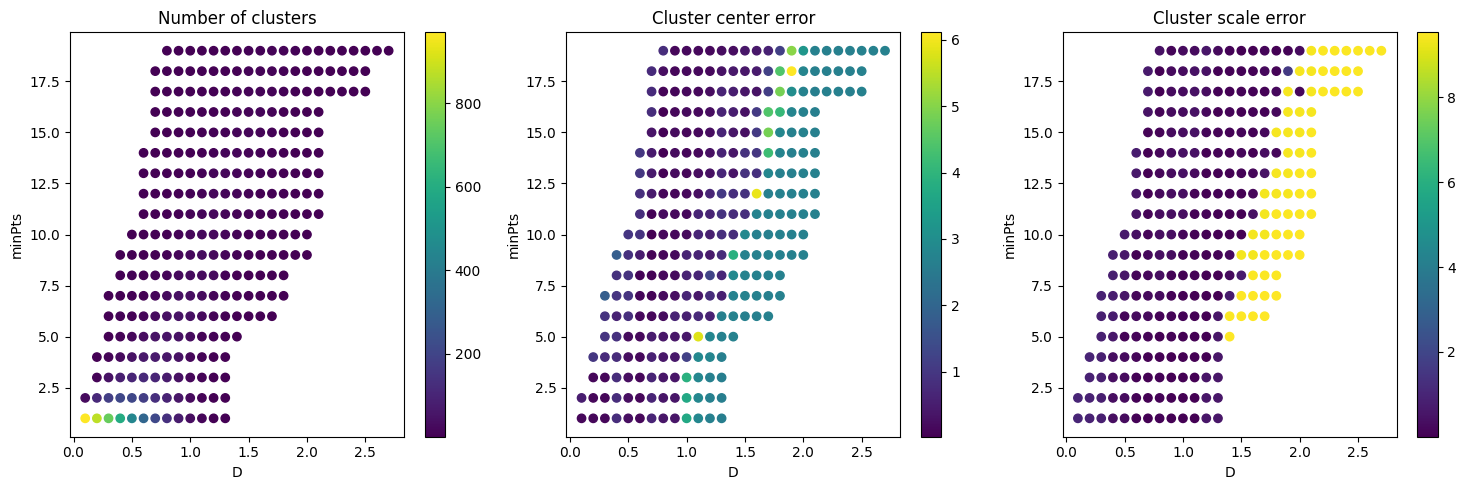

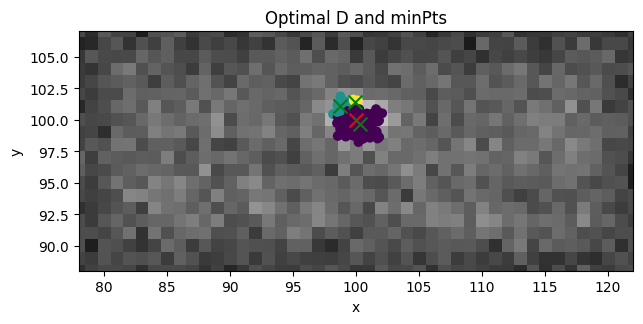

{(0.1, 1): {'num_clusters': 973, 'cluster_center_error': 0.10604934819839651, 'cluster_scale_error': 0.975060903486138}, (0.1, 2): {'num_clusters': 26, 'cluster_center_error': 0.32258611941713017, 'cluster_scale_error': 0.975060903486138}, (0.1, 3): {'num_clusters': 3, 'cluster_center_error': 8.208466007015167, 'cluster_scale_error': 0.9767280648712222}, (0.1, 4): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 5): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 6): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 7): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 8): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 9): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 10): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 11): {

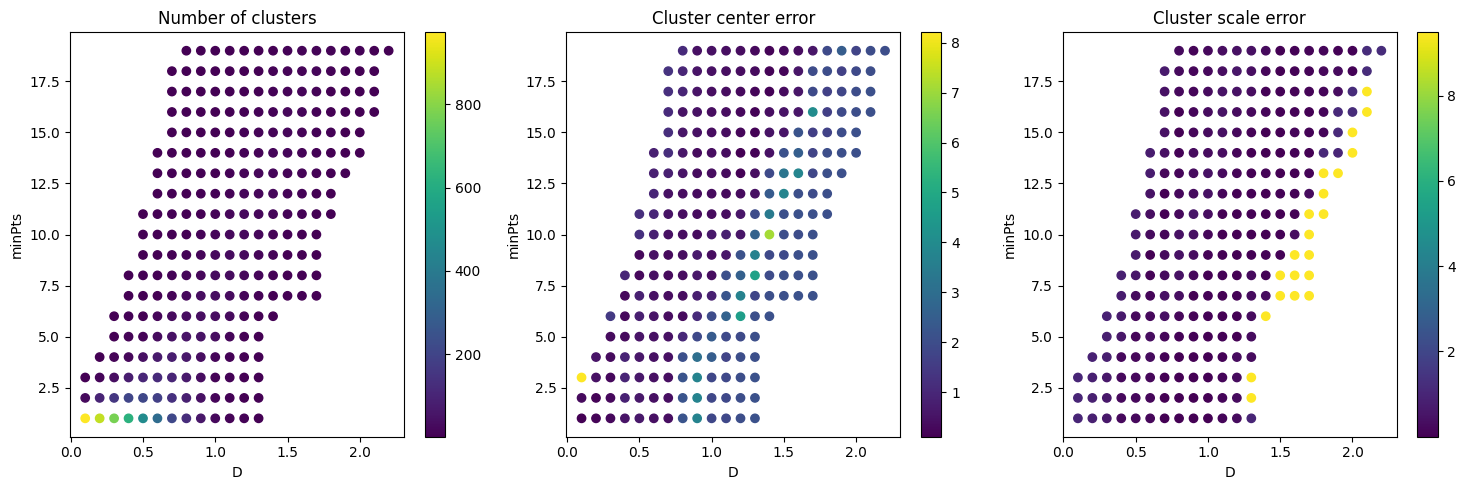

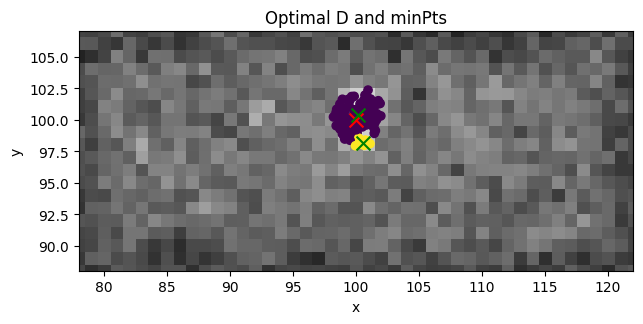

{(0.1, 1): {'num_clusters': 977, 'cluster_center_error': 0.023947631334108595, 'cluster_scale_error': 0.9586983625529986}, (0.1, 2): {'num_clusters': 22, 'cluster_center_error': 0.8407366692786394, 'cluster_scale_error': 0.9586983625529986}, (0.1, 3): {'num_clusters': 3, 'cluster_center_error': 1.0597758415286178, 'cluster_scale_error': 0.9586983625529986}, (0.1, 4): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 5): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 6): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 7): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 8): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 9): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 10): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 11)

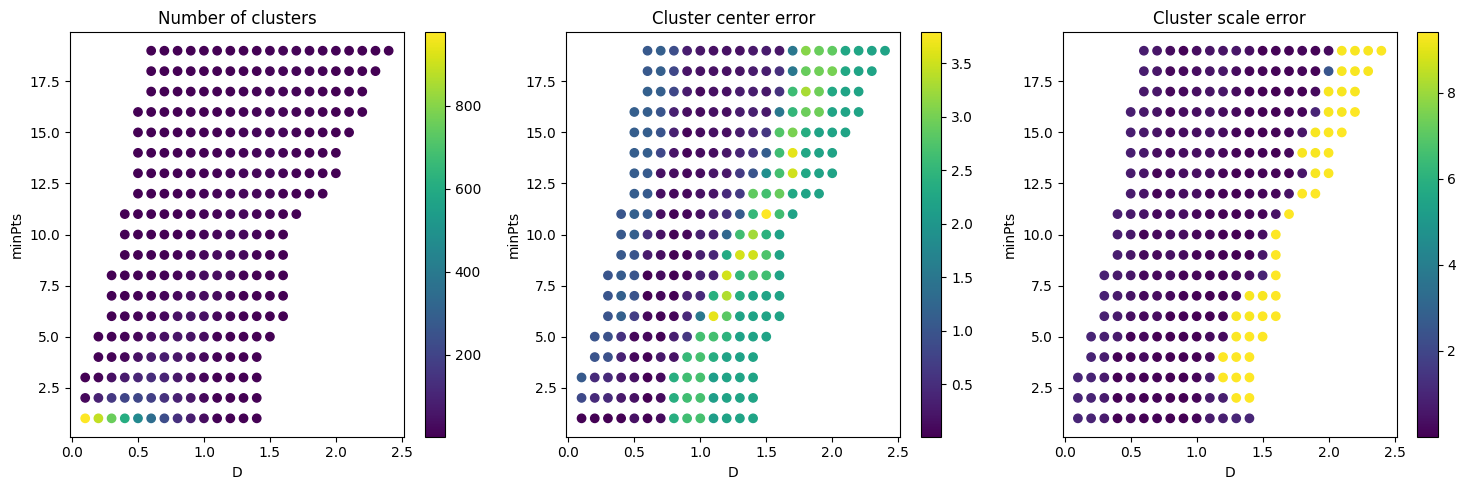

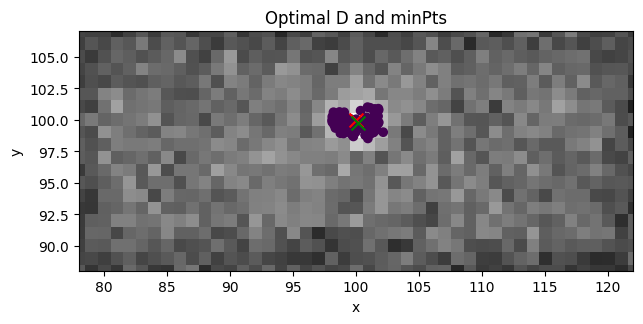

{(0.1, 1): {'num_clusters': 968, 'cluster_center_error': 0.14770781546929984, 'cluster_scale_error': 0.9523341764193257}, (0.1, 2): {'num_clusters': 28, 'cluster_center_error': 0.5576075105604318, 'cluster_scale_error': 0.9523341764193257}, (0.1, 3): {'num_clusters': 4, 'cluster_center_error': 0.6224950728847974, 'cluster_scale_error': 0.9523341764193257}, (0.1, 4): {'num_clusters': 2, 'cluster_center_error': 1.0094802024400868, 'cluster_scale_error': 0.9674333148903179}, (0.1, 5): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 6): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 7): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 8): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 9): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 10): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_sc

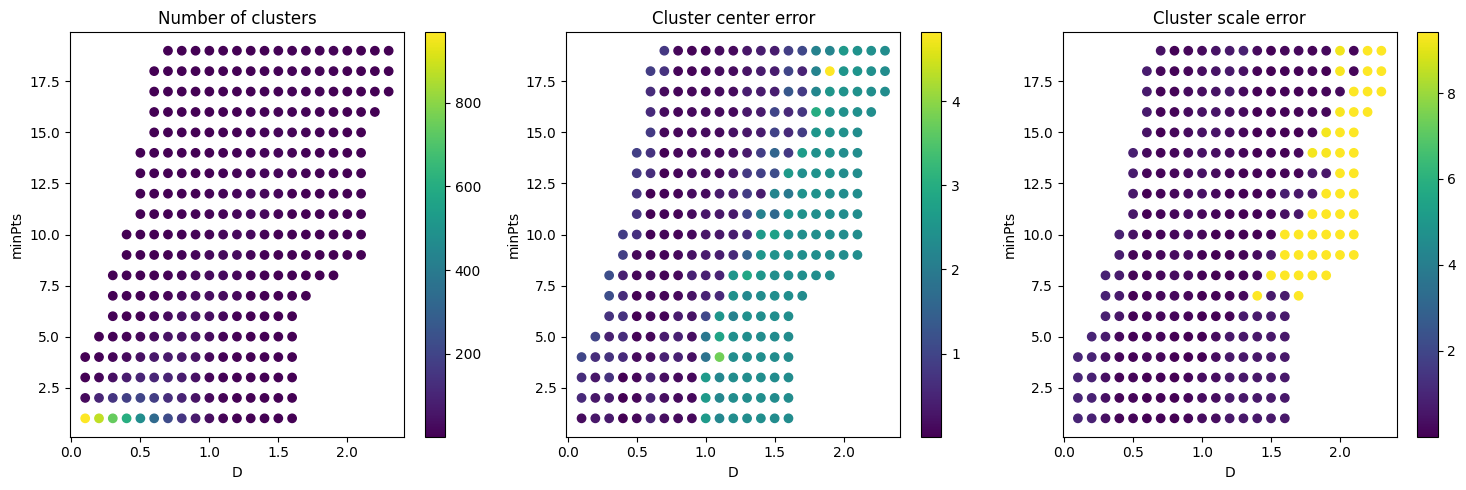

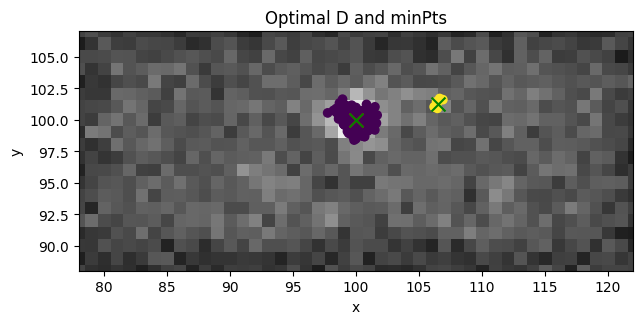

{(0.1, 1): {'num_clusters': 971, 'cluster_center_error': 0.2703060792622189, 'cluster_scale_error': 0.9373318752584624}, (0.1, 2): {'num_clusters': 26, 'cluster_center_error': 0.9195268338013278, 'cluster_scale_error': 0.9373318752584624}, (0.1, 3): {'num_clusters': 3, 'cluster_center_error': 1.1392406808839313, 'cluster_scale_error': 0.9373318752584624}, (0.1, 4): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 5): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 6): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 7): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 8): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 9): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 10): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 11): 

In [6]:
#lets create a fre sims with the same parameters and average out the results for the optimal D and minPts that give the best results
#the best results are the total number of clusters that = the number of true clusters
#and also the true cluster centers are within the identified clusters with an error of 0.5 pixels
#and also the scale is within 10% of the true scale

optimal_D = []
optimal_minPts = []
verbose_result_collection = []
for i in range(10):
    cell_sim = simulate_cells.Simulate_cells(cell_parms,global_sim_params)
    a = cell_sim.get_cell()
    points_per_frame_array = create_all_points(a["points_per_frame"])
    #lets try a range of D and minPts values
    D_range = np.arange(0.1,5,0.1)
    minPts_range = np.arange(1,20,1)
    #lets store the results in a dictionary
    results_dict = {}
    for d in D_range:
        for minPts in minPts_range:
            labels = perform_DBSCAN(a["points_per_frame"],d,minPts)
            #lets get the number of clusters
            num_clusters = len(np.unique(labels))
            #lets get the cluster centers
            cluster_centers = []
            for cluster in np.unique(labels):
                if cluster != -1:
                    cluster_centers.append(np.mean(points_per_frame_array[labels==cluster],axis=0))
            cluster_centers = np.array(cluster_centers)

            #lets get the scale of each cluster
            cluster_scales = []
            for cluster in np.unique(labels):
                if cluster != -1:
                    cluster_scales.append(smallestenclosingcircle.make_circle(points_per_frame_array[labels==cluster])[2])
            cluster_scales = np.array(cluster_scales)
            #only perfrom this if clusters are identified
            if num_clusters>1:
                #lets get the error in the cluster centers
                cluster_center_error = np.min(np.linalg.norm(cluster_centers-true_parms["true_centers"][0],axis=1))
                #lets get the error in the cluster scales
                cluster_scale_error = np.min(np.abs(cluster_scales-true_parms["true_scales"][0])/true_parms["true_scales"][0])
                #lets store the results in a dictionary
                results_dict[(d,minPts)] = {"num_clusters":num_clusters,"cluster_center_error":cluster_center_error,"cluster_scale_error":cluster_scale_error}
            else:
                results_dict[(d,minPts)] = {"num_clusters":np.nan,"cluster_center_error":np.nan,"cluster_scale_error":np.nan}
    print(results_dict)
    #lets get the optimal D and minPts
    try:
        optimal_D.append([key[0] for key in results_dict.keys() if results_dict[key]["num_clusters"]<5 and results_dict[key]["cluster_center_error"]<0.5 and results_dict[key]["cluster_scale_error"]<0.1][0])
        optimal_minPts.append([key[1] for key in results_dict.keys() if results_dict[key]["num_clusters"]<5 and results_dict[key]["cluster_center_error"]<0.5 and results_dict[key]["cluster_scale_error"]<0.1][0])
    except:
        optimal_D.append(np.nan)
        optimal_minPts.append(np.nan)
    verbose_result_collection.append(results_dict)
    print("Optimal D and minPts for simulation {} is {} and {}".format(i+1,optimal_D[-1],optimal_minPts[-1]))
    #lets plot the results
    if optimal_D[-1] is not np.nan:
        fig,ax = plt.subplots(1,3,figsize=(15,5))
        #lets plot the number of clusters - the true (1)
        num_clusters = np.array([results_dict[key]["num_clusters"] for key in results_dict.keys()])
        #plot it as a function of D and minPts used
        ax[0].scatter([key[0] for key in results_dict.keys()],[key[1] for key in results_dict.keys()],c=num_clusters)
        ax[0].set_xlabel("D")
        ax[0].set_ylabel("minPts")
        ax[0].set_title("Number of clusters")


        #lets plot the cluster center error
        cluster_center_error = np.array([results_dict[key]["cluster_center_error"] for key in results_dict.keys()])
        #plot it as a function of D and minPts used
        ax[1].scatter([key[0] for key in results_dict.keys()],[key[1] for key in results_dict.keys()],c=cluster_center_error)
        ax[1].set_xlabel("D")
        ax[1].set_ylabel("minPts")
        ax[1].set_title("Cluster center error")

        #lets plot the cluster scale error
        cluster_scale_error = np.array([results_dict[key]["cluster_scale_error"] for key in results_dict.keys()])
        #plot it as a function of D and minPts used
        ax[2].scatter([key[0] for key in results_dict.keys()],[key[1] for key in results_dict.keys()],c=cluster_scale_error)
        ax[2].set_xlabel("D")
        ax[2].set_ylabel("minPts")
        ax[2].set_title("Cluster scale error")


        #lets make a colorbar for each subplot
        fig.colorbar(ax[0].collections[0],ax=ax[0])
        fig.colorbar(ax[1].collections[0],ax=ax[1])
        fig.colorbar(ax[2].collections[0],ax=ax[2])
        plt.tight_layout()
        plt.show()
        #plot the results of the optimal D and minPts
        labels = perform_DBSCAN(a["points_per_frame"],optimal_D[-1],optimal_minPts[-1])
        #lets get the number of clusters
        num_clusters = len(np.unique(labels))
        #lets get the cluster centers
        cluster_centers = []
        for cluster in np.unique(labels):
            if cluster != -1:
                cluster_centers.append(np.mean(points_per_frame_array[labels==cluster],axis=0))
        cluster_centers = np.array(cluster_centers)
        
        #lets get the scale of each cluster
        cluster_scales = []
        for cluster in np.unique(labels):
            if cluster != -1:
                cluster_scales.append(smallestenclosingcircle.make_circle(points_per_frame_array[labels==cluster])[2])
        cluster_scales = np.array(cluster_scales)
        
        #lets plot the results
        #plot only the points that not noise (label != -1)
        plt.scatter(points_per_frame_array[labels!=-1][:,0],points_per_frame_array[labels!=-1][:,1],c=labels[labels!=-1])
        plt.scatter(true_parms["true_centers"][0][0],true_parms["true_centers"][0][1],c="r",marker="x",s=100)
        plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c="g",marker="x",s=100)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Optimal D and minPts")
        #overlay the image
        plt.imshow(np.sum(a["map"],axis=0),cmap="gray")
        #restrict the axis to the cell space +- 2 pixels
        plt.xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
        plt.ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
        plt.tight_layout()
        plt.show()


    

In [7]:
print("Average optimal D and minPts is {} and {}".format(np.nanmean(optimal_D),np.nanmean(optimal_minPts)))

Average optimal D and minPts is 0.6333333333333334 and 10.333333333333334


In [8]:
#lets now use the optimal_D and optimal_minPts to perform DBSCAN on the real data as we vary the D
#lets vary D from /5 to *5 of the optimal_D
#lower bound is 0.2*mean(optimal_D), upper bound is 5*mean(optimal_D)
#we want to sample this range logarithmically
D_range = np.logspace(np.log10(0.2*np.nanmean(optimal_D)),np.log10(5*np.nanmean(optimal_D)),20)
minPts = int(np.nanmean(optimal_minPts))
PLOT = False
#now we create sims using the parameters. We will repeat 3 times to averge out the values. We will calculate the number of clusters and the cluster center error along with the cluster scale error as we vary D
repeats = 10
true_positives = np.zeros((len(D_range),repeats))
false_positives = np.zeros((len(D_range),repeats))
cluster_center_error = np.zeros((len(D_range),repeats))
cluster_scale_error = np.zeros((len(D_range),repeats))
repeat_maps = []
for r in range(repeats):
    #create a cell sim
    cell_sim = simulate_cells.Simulate_cells(cell_parms,global_sim_params)
    a = cell_sim.get_cell()
    repeat_maps.append(a)
    points_per_frame_array = create_all_points(a["points_per_frame"])
    for i,d in enumerate(D_range):
        #perform DBSCAN
        labels = perform_DBSCAN(a["points_per_frame"],d,minPts)
        #lets get the number of clusters
        num_clusters = len(np.unique(labels))
        #lets get the cluster centers
        cluster_centers = []
        cluster_scales = []
        for cluster in np.unique(labels):
            if cluster != -1:
                #do the enclosing circle
                circle = smallestenclosingcircle.make_circle(points_per_frame_array[labels==cluster])
                cluster_centers.append(circle[0:2])
                #append the cluster scales
                cluster_scales.append(circle[2])
        cluster_centers = np.array(cluster_centers)
        cluster_scales = np.array(cluster_scales)

        if (cluster_centers.shape[0]>1) and (PLOT == True):
            #plot the results
            #plot only the points that not noise (label != -1)
            plt.scatter(points_per_frame_array[labels!=-1][:,0],points_per_frame_array[labels!=-1][:,1],c=labels[labels!=-1])
            plt.scatter(true_parms["true_centers"][0][0],true_parms["true_centers"][0][1],c="r",marker="x",s=100)
            plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c="g",marker="x",s=100)
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("Optimal D and minPts")
            #overlay the image
            plt.imshow(np.sum(a["map"],axis=0),cmap="gray")
            #restrict the axis to the cell space +- 2 pixels
            plt.xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
            plt.ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
            plt.tight_layout()
            plt.show()
            

        #lets get the true positives and false positives
        #if there is a center within 0.5 pixels of the true center it is a true positive
        #if there is no center within 0.5 pixels of the true center it is a false positive
        #lets get the error in the cluster centers


        #lets get the true positives and false positives
        if num_clusters>1:
            cluster_center_error[i,r] = np.min(np.linalg.norm(cluster_centers-true_parms["true_centers"][0],axis=1))
            #lets get the error in the cluster scales
            #which ever cluster center is closest to the true center, lets get the scale of that cluster
            #use the argmin function to determine the location of the minimum in the cluster_centers
            arg_cluster_center = np.argmin(np.linalg.norm(cluster_centers-true_parms["true_centers"][0],axis=1))
            cluster_scale_error[i,r] = np.abs(cluster_scales[arg_cluster_center]-true_parms["true_scales"][0])/true_parms["true_scales"][0]
            #lets get the true positives
            true_positives[i,r] = np.sum(cluster_center_error[i,r]<0.5)
            #lets get the false positives
            false_positives[i,r] = np.sum(cluster_center_error[i,r]>0.5)
        else:
            true_positives[i,r] = 0
            false_positives[i,r] = 1
            cluster_center_error[i,r] = np.nan
            cluster_scale_error[i,r] = np.nan
    print("Repeat {} done".format(r+1))

        

    

Repeat 1 done
Repeat 2 done
Repeat 3 done
Repeat 4 done
Repeat 5 done
Repeat 6 done
Repeat 7 done
Repeat 8 done
Repeat 9 done
Repeat 10 done


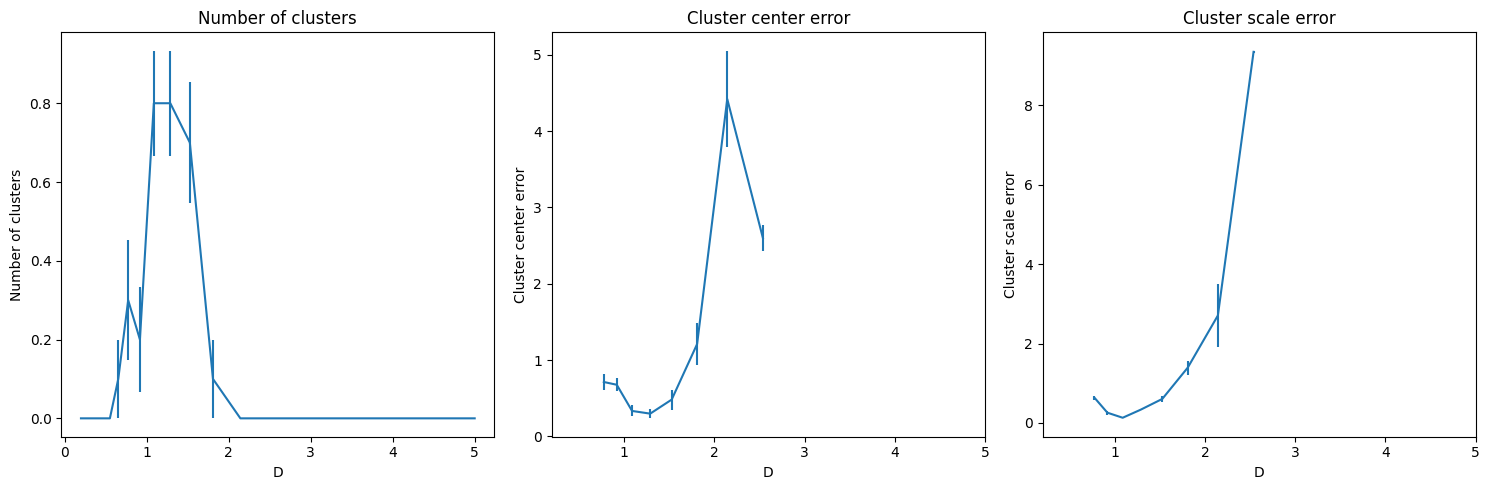

In [46]:
#lets plot the results
fig,ax = plt.subplots(1,3,figsize=(15,5))
#lets plot the number of clusters - the true (1)
ax[0].errorbar(D_range/np.nanmean(optimal_D),np.mean(true_positives,axis=1),yerr=np.std(true_positives,axis=1)/np.sqrt(repeats-1),label="True positives")
ax[0].set_xlabel("D")
ax[0].set_ylabel("Number of clusters")
ax[0].set_title("Number of clusters")

#lets plot the cluster center error
ax[1].errorbar(D_range/np.nanmean(optimal_D),np.mean(cluster_center_error,axis=1),yerr=np.std(cluster_center_error,axis=1)/np.sqrt(repeats-1))
ax[1].set_xlabel("D")
ax[1].set_ylabel("Cluster center error")
ax[1].set_title("Cluster center error")
#set the x range to D_range
ax[1].set_xlim(D_range[0]/np.nanmean(optimal_D),D_range[-1]/np.nanmean(optimal_D))

#lets plot the cluster scale error
ax[2].errorbar(D_range/np.nanmean(optimal_D),np.mean(cluster_scale_error,axis=1),yerr=np.std(cluster_scale_error,axis=1)/np.sqrt(repeats-1))
ax[2].set_xlabel("D")
ax[2].set_ylabel("Cluster scale error")
ax[2].set_title("Cluster scale error")
#set the x range to D_range
ax[2].set_xlim(D_range[0]/np.nanmean(optimal_D),D_range[-1]/np.nanmean(optimal_D))

plt.tight_layout()
plt.show()

#lets save all this data to /Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN with the names respesenting the variable
SAVE = False
import pickle

if SAVE == True:
    #save optimal_D, optimal_minPts, true_positives, false_positives, cluster_center_error, cluster_scale_error, repeat_maps, verbose_result_collection
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/optimal_D.pkl","wb") as f:
        pickle.dump(optimal_D,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/optimal_minPts.pkl","wb") as f:
        pickle.dump(optimal_minPts,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/true_positives.pkl","wb") as f:
        pickle.dump(true_positives,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/false_positives.pkl","wb") as f:
        pickle.dump(false_positives,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/cluster_center_error.pkl","wb") as f:
        pickle.dump(cluster_center_error,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/cluster_scale_error.pkl","wb") as f:
        pickle.dump(cluster_scale_error,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/repeat_maps.pkl","wb") as f:
        pickle.dump(repeat_maps,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/verbose_result_collection.pkl","wb") as f:
        pickle.dump(verbose_result_collection,f)
    #also save the initial_dict and cell_parms, global_sim_params in the same directory
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/initial_dict.pkl","wb") as f:
        pickle.dump(initial_dict,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/cell_parms.pkl","wb") as f:
        pickle.dump(cell_parms,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/DBSCAN/global_sim_params.pkl","wb") as f:
        pickle.dump(global_sim_params,f)


In [25]:
#lets do this but for scale-space
#lets make a utility function to perform the scale-space
def scale_utility(img_map,threshold):
    b = blob_detection(path = img_map,\
                    median= False,\
                    threshold= threshold, \
                    min_sigma= 1/np.sqrt(2), \
                    max_sigma = 10/np.sqrt(2), \
                    num_sigma= 500, \
                    overlap = 0.5, \
                    logscale=False,
                    verbose=True)
    b._update_fitting_parameters(kwargs={"mask_size":5,
                                "plot_fit":False,
                                "fitting_image":"Original",
                                "radius_func":None,
                                "sigma_range":2,
                                "centroid_range":2})
    c = b.detection(type = "bp")
    return c

In [36]:
#perform the scale-space on the repeat_maps
scale_space_results = []
threshold_range = np.logspace(np.log10(2e2),np.log10(5e3),20)
print(threshold_range)
for i in threshold_range:
    scale_space_results.append(scale_utility(np.sum(repeat_maps[0]["map"],axis=0),i))
    print("Threshold {} done".format(i))
    

[ 200.          236.92221574  280.66068156  332.47375274  393.85209087
  466.56155022  552.69398129  654.72741338  775.59734743  918.78121038
 1088.39840073 1289.32880356 1527.3531848  1809.31950382 2143.33992915
 2539.02422552 3007.75622667 3563.02134818 4220.79456275 5000.        ]


/Users/baljyot/opt/anaconda3/envs/py310/lib/python3.10/site-packages/lmfit/minimizer.py:853: RuntimeWarning: divide by zero encountered in double_scalars
  par.correl[varn2] = (self.result.covar[ivar, jvar] /


Threshold 200.00000000000003 done
Threshold 236.92221574249285 done
Threshold 280.6606815616619 done
Threshold 332.47375273693564 done
Threshold 393.8520908732828 done
Threshold 466.561550222559 done
Threshold 552.693981294905 done
Threshold 654.7274133796446 done
Threshold 775.5973474262822 done
Threshold 918.7812103811749 done
Threshold 1088.398400730387 done
Threshold 1289.3288035581445 done
Threshold 1527.3531847980657 done
Threshold 1809.3195038185543 done
Threshold 2143.339929154 done
Threshold 2539.0242255226162 done
Threshold 3007.7562266734253 done
Threshold 3563.0213481837404 done
Threshold 4220.794562747483 done
Threshold 4999.999999999999 done


In [38]:
#for each scale_space_result, lets get the number of clusters, cluster center error and cluster scale error
scale_space_num_clusters = []
scale_space_cluster_center_error = []
scale_space_cluster_scale_error = []
scale_space_true_positives = []
scale_space_false_positives = []
for i in range(len(scale_space_results)):
    fitted_blobs = scale_space_results[i]["Fitted"]
    #lets get the number of clusters
    scale_space_num_clusters.append(len(fitted_blobs))
    scale_space_false_positives.append(len(fitted_blobs)-1)
    #lets get the cluster centers
    cluster_centers = []
    cluster_scales = []
    for blob in fitted_blobs:
        cluster_centers.append(blob[0:2])
        cluster_scales.append(blob[2])
    cluster_centers = np.array(cluster_centers)
    cluster_scales = np.array(cluster_scales)
    if len(cluster_centers)>1:
        #lets get the cluster center error
        scale_space_cluster_center_error.append(np.min(np.linalg.norm(cluster_centers-true_parms["true_centers"][0],axis=1)))
        #lets get the cluster scale error
        #which ever cluster center is closest to the true center, lets get the scale of that cluster
        #use the argmin function to determine the location of the minimum in the cluster_centers
        arg_cluster_center = np.argmin(np.linalg.norm(cluster_centers-true_parms["true_centers"][0],axis=1))
        scale_space_cluster_scale_error.append(np.abs(cluster_scales[arg_cluster_center]-true_parms["true_scales"][0])/true_parms["true_scales"][0])
        #lets get the true positives
        scale_space_true_positives.append(np.sum(scale_space_cluster_center_error[-1]<0.5))
    else:
        scale_space_cluster_center_error.append(np.nan)
        scale_space_cluster_scale_error.append(np.nan)
        scale_space_true_positives.append(0)
print("Scale space done")



Scale space done


In [94]:
SAVE = False

if SAVE == True:
    #save the scale_space_num_clusters, scale_space_cluster_center_error, scale_space_cluster_scale_error, scale_space_true_positives, scale_space_false_positives, threshold_range
    #use the director /Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/scale_space_num_clusters.pkl","wb") as f:
        pickle.dump(scale_space_num_clusters,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/scale_space_cluster_center_error.pkl","wb") as f:
        pickle.dump(scale_space_cluster_center_error,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/scale_space_cluster_scale_error.pkl","wb") as f:
        pickle.dump(scale_space_cluster_scale_error,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/scale_space_true_positives.pkl","wb") as f:
        pickle.dump(scale_space_true_positives,f)
    #also save the threshold_range
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/threshold_range.pkl","wb") as f:
        pickle.dump(threshold_range,f)
    #also save the initial_dict and cell_parms, global_sim_params in the same directory
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/initial_dict.pkl","wb") as f:
        pickle.dump(initial_dict,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/cell_parms.pkl","wb") as f:
        pickle.dump(cell_parms,f)
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/global_sim_params.pkl","wb") as f:
        pickle.dump(global_sim_params,f)
    #save the repeat_maps
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/repeat_maps.pkl","wb") as f:
        pickle.dump(repeat_maps,f)
    #save the scale_space_results
    with open("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Data_plot/Scale_Space/scale_space_results.pkl","wb") as f:
        pickle.dump(scale_space_results,f)

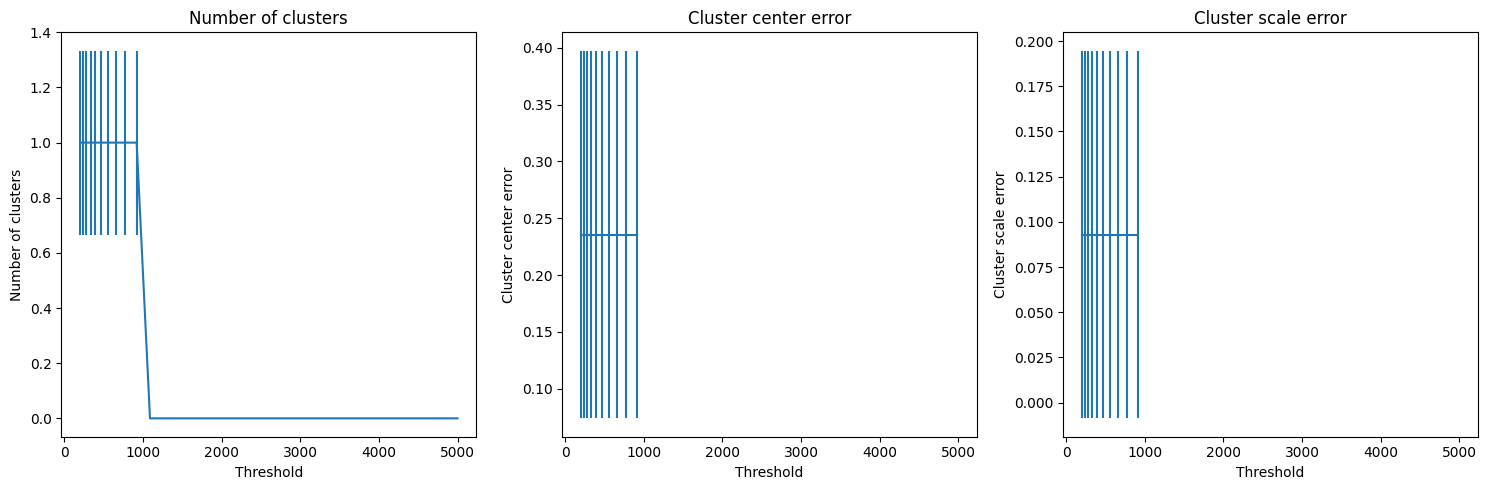

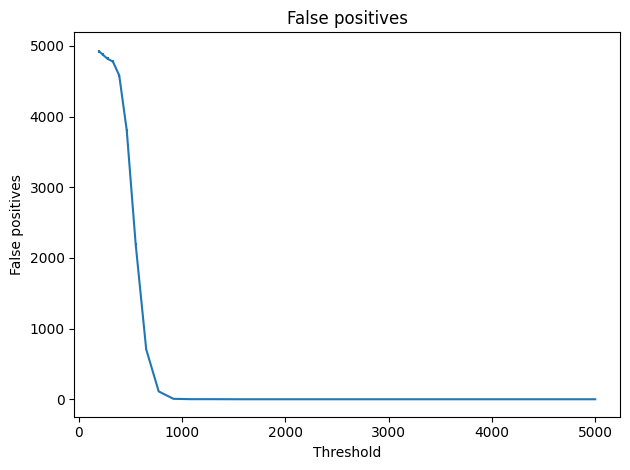

In [101]:
#plot the results
fig,ax = plt.subplots(1,3,figsize=(15,5))
#lets plot the number of clusters - the true (1)
ax[0].errorbar(threshold_range,scale_space_true_positives,yerr=np.sqrt(scale_space_true_positives)/np.sqrt(repeats-1),label="True positives")
ax[0].set_xlabel("Threshold")
ax[0].set_ylabel("Number of clusters")
ax[0].set_title("Number of clusters")

#lets plot the cluster center error
ax[1].errorbar(threshold_range,scale_space_cluster_center_error,yerr=np.sqrt(scale_space_cluster_center_error)/np.sqrt(repeats-1))
ax[1].set_xlabel("Threshold")
ax[1].set_ylabel("Cluster center error")
ax[1].set_title("Cluster center error")


#lets plot the cluster scale error
ax[2].errorbar(threshold_range,scale_space_cluster_scale_error,yerr=np.sqrt(scale_space_cluster_scale_error)/np.sqrt(repeats-1))
ax[2].set_xlabel("Threshold")
ax[2].set_ylabel("Cluster scale error")
ax[2].set_title("Cluster scale error")

plt.tight_layout()
plt.show()

#plot the false positives
plt.errorbar(threshold_range,scale_space_false_positives,yerr=np.sqrt(scale_space_false_positives)/np.sqrt(repeats-1))
plt.xlabel("Threshold")
plt.ylabel("False positives")
plt.title("False positives")
plt.tight_layout()
plt.show()


In [69]:
#okay lets finally make the plot for the thesis

#the first is the ground truth of the map and the localizations
#make a sim for this
cell_sim = simulate_cells.Simulate_cells(cell_parms,global_sim_params)
a = cell_sim.get_cell()
points_per_frame_array = create_all_points(a["points_per_frame"])
#do the DBSCAN with the optimal D and minPts
labels = perform_DBSCAN(a["points_per_frame"],np.nanmean(optimal_D),int(np.nanmean(optimal_minPts)))
#lets get the number of clusters
num_clusters = len(np.unique(labels))
#lets get the cluster centers and scale using enclosing circle
cluster_centers = []
cluster_scales = []
for cluster in np.unique(labels):
    if cluster != -1:
        #do the enclosing circle
        circle = smallestenclosingcircle.make_circle(points_per_frame_array[labels==cluster])
        cluster_centers.append(circle[0:2])
        #append the cluster scales
        cluster_scales.append(circle[2])
cluster_centers = np.array(cluster_centers)
cluster_scales = np.array(cluster_scales)

#lets do the scale space now
scale_space_results = scale_utility(np.sum(a["map"],axis=0),1e3)
fitted_blobs = scale_space_results["Fitted"]
#lets get the number of clusters
scale_space_num_clusters = len(fitted_blobs)
#lets get the cluster centers
cluster_centers_scale_space = []
cluster_scales_scale_space = []
for blob in fitted_blobs:
    cluster_centers_scale_space.append(blob[0:2])
    cluster_scales_scale_space.append(np.mean([blob[2],blob[3]]))
cluster_centers_scale_space = np.array(cluster_centers_scale_space)
cluster_scales_scale_space = np.array(cluster_scales_scale_space)





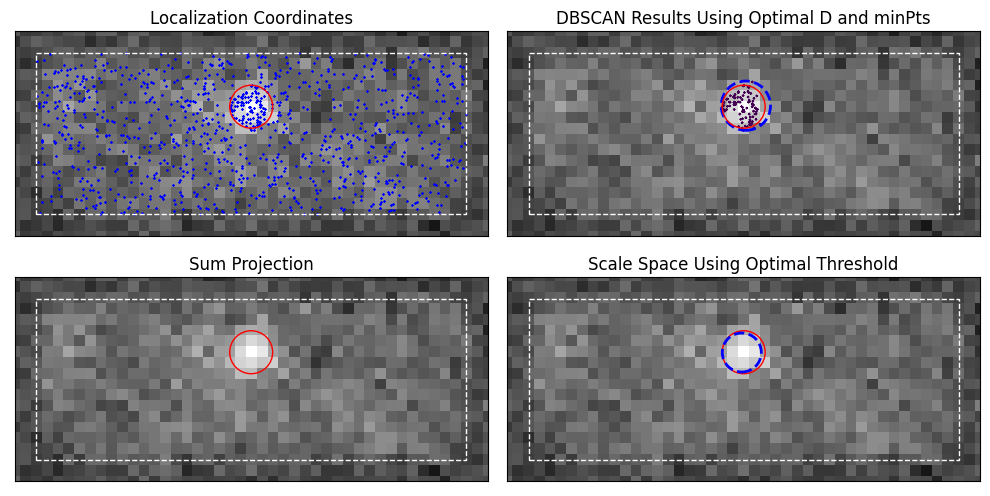

In [100]:
#lets plot the results in a figure 4 subplots using GS gridspec
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(4, 2)
ax1 = fig.add_subplot(gs[0, 0])

#for the first axis plot the sum cell map with the localizations
ax1.scatter(points_per_frame_array[:,0],points_per_frame_array[:,1],c='b',s=1,marker='x')
ax1.set_title("Localization Coordinates")
#overlay the image
ax1.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax1.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax1.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax1.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax1.add_artist(circle)

#make the second axis plot the DBSCAN results
ax2 = fig.add_subplot(gs[0, 1])
#plot only the points that not noise (label != -1)
ax2.scatter(points_per_frame_array[labels!=-1][:,0],points_per_frame_array[labels!=-1][:,1],c=labels[labels!=-1],s=1,marker='x')
#plot the enclosign circle
for j in range(len(cluster_centers)):
    circle = plt.Circle((cluster_centers[j][0],cluster_centers[j][1]), cluster_scales[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax2.add_artist(circle)
ax2.set_title("DBSCAN Results Using Optimal D and minPts")
#overlay the image
ax2.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax2.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax2.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax2.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax2.add_artist(circle)


#make the third plot with just the sum cell map 
ax3 = fig.add_subplot(gs[1, 0])
ax3.imshow(np.sum(a["map"],axis=0),cmap="gray")
ax3.set_title("Sum Projection")
#restrict the axis to the cell space +- 2 pixels
ax3.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax3.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax3.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax3.add_artist(circle)

#make the fourth plot with the scale space results ontop 
ax4 = fig.add_subplot(gs[1, 1])
ax4.imshow(np.sum(a["map"],axis=0),cmap="gray")
ax4.set_title("Scale Space Using Optimal Threshold")
#restrict the axis to the cell space +- 2 pixels
ax4.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax4.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax4.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax4.add_artist(circle)
#plot the enclosign circle
for j in range(len(cluster_centers_scale_space)):
    circle = plt.Circle((cluster_centers_scale_space[j][0],cluster_centers_scale_space[j][1]), cluster_scales_scale_space[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax4.add_artist(circle)

#remove the ticks from all the plots
for ax in fig.get_axes():
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

SAVE = False

if SAVE == True:
    #save the figure as .eps in /Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3 with the name "optimal_DBSCAN_Scale_Space.eps"
    fig.savefig("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/optimal_DBSCAN_Scale_Space.svg",format="svg",dpi=200)
    
plt.show()



In [229]:
#find the number of points in the intial_centers with radius initial_scale

xy = points_per_frame_array
x = xy[:,0]
y = xy[:,1]
center_x = initial_dict["initial_centers"][0][0]
center_y = initial_dict["initial_centers"][0][1]
radius = initial_dict["initial_scale"][0]
#lets get the number of points in the circle
num_points = np.sum((x-center_x)**2 + (y-center_y)**2 < radius**2)
print("Number of points in the circle is {}".format(num_points))
#find the area of the cell space
cell_space = cell_parms["cell_space"]
cell_space_area = (cell_space[1]-cell_space[0])*(cell_space[3]-cell_space[2])
print("Area of the cell space is {}".format(cell_space_area))

#lets get the density of the points in the circle and the cell space
density_points = (1000-num_points)/cell_space_area
print("Density of points in the circle is {}".format(density_points))
#circle area
circle_area = np.pi*radius**2
print("Area of the circle is {}".format(circle_area))
#density of points in the circle
density_points_circle = num_points/circle_area
print("Density of points in the circle is {}".format(density_points_circle))



Number of points in the circle is 98
Area of the cell space is 600
Density of points in the circle is 1.5033333333333334
Area of the circle is 12.566370614359172
Density of points in the circle is 7.798592211502871


In [75]:
print(D_range), print(np.nanmean(optimal_D)), print(np.nanmean(optimal_minPts))

[0.12666667 0.15005074 0.17775176 0.21056671 0.24943966 0.29548898
 0.35003952 0.4146607  0.49121165 0.58189477 0.68931899 0.81657491
 0.96732368 1.14590235 1.35744862 1.60804868 1.90491228 2.25658019
 2.67316989 3.16666667]
0.6333333333333334
10.333333333333334


(None, None, None)

In [76]:
#lets repeat the DBSCAN for D_range[0] and D_range[-1] to see how the results change
labels_D_range_0 = perform_DBSCAN(a["points_per_frame"],D_range[0],int(np.nanmean(optimal_minPts)))
labels_D_range_1 = perform_DBSCAN(a["points_per_frame"],D_range[-1],int(np.nanmean(optimal_minPts)))
#lets get the number of clusters
num_clusters_D_range_0 = len(np.unique(labels_D_range_0))
num_clusters_D_range_1 = len(np.unique(labels_D_range_1))
#lets get the cluster centers and scale using enclosing circle
cluster_centers_D_range_0 = []
cluster_scales_D_range_0 = []
for cluster in np.unique(labels_D_range_0):
    if cluster != -1:
        #do the enclosing circle
        circle = smallestenclosingcircle.make_circle(points_per_frame_array[labels_D_range_0==cluster])
        cluster_centers_D_range_0.append(circle[0:2])
        #append the cluster scales
        cluster_scales_D_range_0.append(circle[2])
cluster_centers_D_range_0 = np.array(cluster_centers_D_range_0)
cluster_scales_D_range_0 = np.array(cluster_scales_D_range_0)

cluster_centers_D_range_1 = []
cluster_scales_D_range_1 = []
for cluster in np.unique(labels_D_range_1):
    if cluster != -1:
        #do the enclosing circle
        circle = smallestenclosingcircle.make_circle(points_per_frame_array[labels_D_range_1==cluster])
        cluster_centers_D_range_1.append(circle[0:2])
        #append the cluster scales
        cluster_scales_D_range_1.append(circle[2])
cluster_centers_D_range_1 = np.array(cluster_centers_D_range_1)
cluster_scales_D_range_1 = np.array(cluster_scales_D_range_1)

#now do this for scale space but with 2e2 and 5e3
scale_space_results_2e2 = scale_utility(np.sum(a["map"],axis=0),2e2)
scale_space_results_5e3 = scale_utility(np.sum(a["map"],axis=0),5e3)
fitted_blobs_2e2 = scale_space_results_2e2["Fitted"]
fitted_blobs_5e3 = scale_space_results_5e3["Fitted"]
#lets get the number of clusters
scale_space_num_clusters_2e2 = len(fitted_blobs_2e2)
scale_space_num_clusters_5e3 = len(fitted_blobs_5e3)
#lets get the cluster centers
cluster_centers_scale_space_2e2 = []
cluster_scales_scale_space_2e2 = []
for blob in fitted_blobs_2e2:
    cluster_centers_scale_space_2e2.append(blob[0:2])
    cluster_scales_scale_space_2e2.append(np.mean([blob[2],blob[3]]))
cluster_centers_scale_space_2e2 = np.array(cluster_centers_scale_space_2e2)
cluster_scales_scale_space_2e2 = np.array(cluster_scales_scale_space_2e2)

cluster_centers_scale_space_5e3 = []
cluster_scales_scale_space_5e3 = []
for blob in fitted_blobs_5e3:
    cluster_centers_scale_space_5e3.append(blob[0:2])
    cluster_scales_scale_space_5e3.append(np.mean([blob[2],blob[3]]))
cluster_centers_scale_space_5e3 = np.array(cluster_centers_scale_space_5e3)
cluster_scales_scale_space_5e3 = np.array(cluster_scales_scale_space_5e3)




/Users/baljyot/opt/anaconda3/envs/py310/lib/python3.10/site-packages/lmfit/minimizer.py:853: RuntimeWarning: divide by zero encountered in double_scalars
  par.correl[varn2] = (self.result.covar[ivar, jvar] /


In [110]:
#lets do the DBSCAN for D_range[0] and D_range[-1] and also int(np.nanmean(optimal_minPts)*0.2) and int(np.nanmean(optimal_minPts)*5)
labels_D_range_0_minPts_0_2 = perform_DBSCAN(a["points_per_frame"],D_range[0],int(np.nanmean(optimal_minPts)*0.2))
labels_D_range_1_minPts_5 = perform_DBSCAN(a["points_per_frame"],D_range[-1],int(np.nanmean(optimal_minPts)*5))

#lets get the number of clusters
num_clusters_D_range_0_minPts_0_2 = len(np.unique(labels_D_range_0_minPts_0_2))
num_clusters_D_range_1_minPts_5 = len(np.unique(labels_D_range_1_minPts_5))
#lets get the cluster centers and scale using enclosing circle
cluster_centers_D_range_0_minPts_0_2 = []
cluster_scales_D_range_0_minPts_0_2 = []
for cluster in np.unique(labels_D_range_0_minPts_0_2):
    if cluster != -1:
        #do the enclosing circle
        circle = smallestenclosingcircle.make_circle(points_per_frame_array[labels_D_range_0_minPts_0_2==cluster])
        cluster_centers_D_range_0_minPts_0_2.append(circle[0:2])
        #append the cluster scales
        cluster_scales_D_range_0_minPts_0_2.append(circle[2])
cluster_centers_D_range_0_minPts_0_2 = np.array(cluster_centers_D_range_0_minPts_0_2)
cluster_scales_D_range_0_minPts_0_2 = np.array(cluster_scales_D_range_0_minPts_0_2)

cluster_centers_D_range_1_minPts_5 = []
cluster_scales_D_range_1_minPts_5 = []
for cluster in np.unique(labels_D_range_1_minPts_5):
    if cluster != -1:
        #do the enclosing circle
        circle = smallestenclosingcircle.make_circle(points_per_frame_array[labels_D_range_1_minPts_5==cluster])
        cluster_centers_D_range_1_minPts_5.append(circle[0:2])
        #append the cluster scales
        cluster_scales_D_range_1_minPts_5.append(circle[2])
cluster_centers_D_range_1_minPts_5 = np.array(cluster_centers_D_range_1_minPts_5)
cluster_scales_D_range_1_minPts_5 = np.array(cluster_scales_D_range_1_minPts_5)




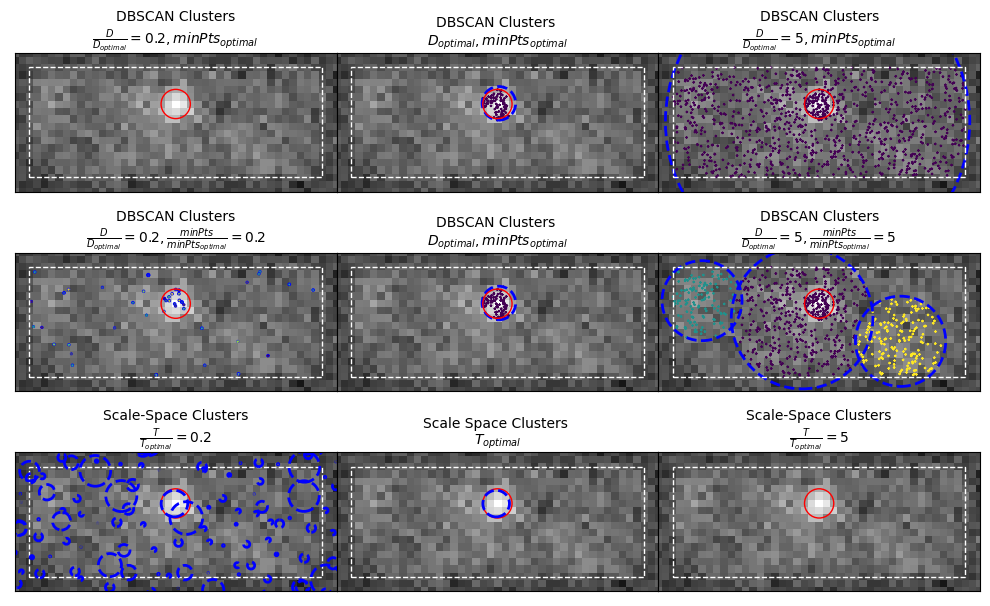

In [119]:
#make a figure with 2X3 subplots
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(3, 3)

#add the first plot 
ax1 = fig.add_subplot(gs[0, 0])
#for the first axis plot the results of DBSCAN with D_range[0]
ax1.scatter(points_per_frame_array[labels_D_range_0!=-1][:,0],points_per_frame_array[labels_D_range_0!=-1][:,1],c=labels_D_range_0[labels_D_range_0!=-1],s=1,marker='x')
#plot the enclosign circle
for j in range(len(cluster_centers_D_range_0)):
    circle = plt.Circle((cluster_centers_D_range_0[j][0],cluster_centers_D_range_0[j][1]), cluster_scales_D_range_0[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax1.add_artist(circle)
#make the title DBSCAN Clusters with D/D_optimal = 0.2 in latex
ax1.set_title("DBSCAN Clusters\n" + r"$\frac{D}{D_{optimal}}=0.2, minPts_{optimal}$",fontsize=10)
#overlay the image
ax1.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax1.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax1.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax1.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax1.add_artist(circle)

#add the second plot
ax2 = fig.add_subplot(gs[0, 1])
#for the first axis plot the results of DBSCAN with the optimal as we need in the previous figure
ax2.scatter(points_per_frame_array[labels!=-1][:,0],points_per_frame_array[labels!=-1][:,1],c=labels[labels!=-1],s=1,marker='x')
#plot the enclosign circle
for j in range(len(cluster_centers)):
    circle = plt.Circle((cluster_centers[j][0],cluster_centers[j][1]), cluster_scales[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax2.add_artist(circle)
ax2.set_title("DBSCAN Clusters \n" + r"$D_{optimal}, minPts_{optimal}$",fontsize=10)
#overlay the image
ax2.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax2.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax2.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax2.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax2.add_artist(circle)

#add the third plot
ax3 = fig.add_subplot(gs[0, 2])
#for the first axis plot the results of DBSCAN with D_range[-1]
ax3.scatter(points_per_frame_array[labels_D_range_1!=-1][:,0],points_per_frame_array[labels_D_range_1!=-1][:,1],c=labels_D_range_1[labels_D_range_1!=-1],s=1,marker='x')
#plot the enclosign circle
for j in range(len(cluster_centers_D_range_1)):
    circle = plt.Circle((cluster_centers_D_range_1[j][0],cluster_centers_D_range_1[j][1]), cluster_scales_D_range_1[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax3.add_artist(circle)
ax3.set_title("DBSCAN Clusters\n" + r"$\frac{D}{D_{optimal}}=5, minPts_{optimal}$",fontsize=10)
#overlay the image
ax3.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax3.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax3.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax3.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax3.add_artist(circle)



#add the fourth plot for the DBSCAN with D_range[0] and minPts = 0.2*minPts_optimal
ax4 = fig.add_subplot(gs[1, 0])
#for the first axis plot the results of DBSCAN with D_range[0]
ax4.scatter(points_per_frame_array[labels_D_range_0_minPts_0_2!=-1][:,0],points_per_frame_array[labels_D_range_0_minPts_0_2!=-1][:,1],c=labels_D_range_0_minPts_0_2[labels_D_range_0_minPts_0_2!=-1],s=1,marker='x')
#plot the enclosign circle
for j in range(len(cluster_centers_D_range_0_minPts_0_2)):
    circle = plt.Circle((cluster_centers_D_range_0_minPts_0_2[j][0],cluster_centers_D_range_0_minPts_0_2[j][1]), cluster_scales_D_range_0_minPts_0_2[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax4.add_artist(circle)
ax4.set_title("DBSCAN Clusters\n" + r"$\frac{D}{D_{optimal}}=0.2, \frac{minPts}{minPts_{optimal}} = 0.2$",fontsize=10)
#overlay the image
ax4.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax4.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax4.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax4.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax4.add_artist(circle)

#add the fifth plot for the DBSCAN with optimal D and optimal minPts
ax5 = fig.add_subplot(gs[1, 1])
#for the first axis plot the results of DBSCAN with the optimal as we need in the previous figure
ax5.scatter(points_per_frame_array[labels!=-1][:,0],points_per_frame_array[labels!=-1][:,1],c=labels[labels!=-1],s=1,marker='x')
#plot the enclosign circle
for j in range(len(cluster_centers)):
    circle = plt.Circle((cluster_centers[j][0],cluster_centers[j][1]), cluster_scales[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax5.add_artist(circle)
ax5.set_title("DBSCAN Clusters \n" + r"$D_{optimal}, minPts_{optimal}$",fontsize=10)
#overlay the image
ax5.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax5.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax5.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax5.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax5.add_artist(circle)

#add the sixth plot for the DBSCAN with D_range[-1] and minPts = 5*minPts_optimal
ax6 = fig.add_subplot(gs[1, 2])
#for the first axis plot the results of DBSCAN with D_range[-1]
ax6.scatter(points_per_frame_array[labels_D_range_1_minPts_5!=-1][:,0],points_per_frame_array[labels_D_range_1_minPts_5!=-1][:,1],c=labels_D_range_1_minPts_5[labels_D_range_1_minPts_5!=-1],s=1,marker='x')
#plot the enclosign circle
for j in range(len(cluster_centers_D_range_1_minPts_5)):
    circle = plt.Circle((cluster_centers_D_range_1_minPts_5[j][0],cluster_centers_D_range_1_minPts_5[j][1]), cluster_scales_D_range_1_minPts_5[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax6.add_artist(circle)
ax6.set_title("DBSCAN Clusters\n" + r"$\frac{D}{D_{optimal}}=5, \frac{minPts}{minPts_{optimal}} = 5$",fontsize=10)
#overlay the image
ax6.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax6.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax6.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax6.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax6.add_artist(circle)






#add the fourth plot
ax7 = fig.add_subplot(gs[2, 0])
#for the first axis plot the results of scale space with 2e2
ax7.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax7.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax7.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax7.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax7.add_artist(circle)
#plot the enclosign circle
for j in range(len(cluster_centers_scale_space_2e2)):
    circle = plt.Circle((cluster_centers_scale_space_2e2[j][0],cluster_centers_scale_space_2e2[j][1]), cluster_scales_scale_space_2e2[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax7.add_artist(circle)
ax7.set_title("Scale-Space Clusters\n" + r"$\frac{T}{T_{optimal}}=0.2$",fontsize=10)

#add the fifth plot
ax8 = fig.add_subplot(gs[2, 1])
#for the first axis plot the results of scale space with the optimal as we need in the previous figure
ax8.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax8.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax8.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax8.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax8.add_artist(circle)
#plot the enclosign circle
for j in range(len(cluster_centers_scale_space)):
    circle = plt.Circle((cluster_centers_scale_space[j][0],cluster_centers_scale_space[j][1]), cluster_scales_scale_space[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax8.add_artist(circle)
ax8.set_title("Scale Space Clusters \n" + r"$T_{optimal}$",fontsize=10)

#add the sixth plot
ax9 = fig.add_subplot(gs[2, 2])
#for the first axis plot the results of scale space with 5e3
ax9.imshow(np.sum(a["map"],axis=0),cmap="gray")
#restrict the axis to the cell space +- 2 pixels
ax9.set_xlim(cell_parms["cell_space"][0]-2,cell_parms["cell_space"][1]+2)
ax9.set_ylim(cell_parms["cell_space"][2]-2,cell_parms["cell_space"][3]+2)
#plot the cell outline as a rectange defined by the cell_space
rect = plt.Rectangle((cell_parms["cell_space"][0],cell_parms["cell_space"][2]), cell_parms["cell_space"][1]-cell_parms["cell_space"][0], cell_parms["cell_space"][3]-cell_parms["cell_space"][2], color='w', fill=False,linestyle='--')
ax9.add_artist(rect)
#plot the foci as a circle with center and radius defined by the initial centers and scale
for j in range(len(initial_dict["initial_centers"])):
    circle = plt.Circle((initial_dict["initial_centers"][j][0],initial_dict["initial_centers"][j][1]), initial_dict["initial_scale"][j], color='r', fill=False, linestyle='-',linewidth=1)
    ax9.add_artist(circle)
#plot the enclosign circle
for j in range(len(cluster_centers_scale_space_5e3)):
    circle = plt.Circle((cluster_centers_scale_space_5e3[j][0],cluster_centers_scale_space_5e3[j][1]), cluster_scales_scale_space_5e3[j], color='b', fill=False, linestyle='--',linewidth=2)
    ax9.add_artist(circle)
ax9.set_title("Scale-Space Clusters\n" + r"$\frac{T}{T_{optimal}}=5$",fontsize=10)


#remove the ticks from all the plots
for ax in fig.get_axes():
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
#remove the space between the plots
plt.subplots_adjust(wspace=0, hspace=-0.65)
SAVE = False

if SAVE == True:
    #save the figure as .eps in /Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3 with the name "Range_Optimal_DBSCAN_Scale_Space.eps"
    fig.savefig("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/range_optimal_DBSCAN_Scale_Space.svg",format="svg",dpi=200)
    
plt.show()


{(0.1, 1): {'num_clusters': 956, 'cluster_center_error': 0.21602671512809307, 'cluster_scale_error': 0.964894985355509}, (0.1, 2): {'num_clusters': 39, 'cluster_center_error': 0.37339849726564167, 'cluster_scale_error': 0.964894985355509}, (0.1, 3): {'num_clusters': 6, 'cluster_center_error': 0.984883492747389, 'cluster_scale_error': 0.964894985355509}, (0.1, 4): {'num_clusters': 2, 'cluster_center_error': 1.4412594980346651, 'cluster_scale_error': 0.964894985355509}, (0.1, 5): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 6): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 7): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 8): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 9): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_error': nan}, (0.1, 10): {'num_clusters': nan, 'cluster_center_error': nan, 'cluster_scale_

/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_30404/3522229011.py:33: RuntimeWarning: Mean of empty slice
  ax1_plot = ax1.scatter([key[0] for key in D_minp_combination_num_clusters.keys()],[key[1] for key in D_minp_combination_num_clusters.keys()],c=np.log10(np.array([np.nanmean(value) for value in D_minp_combination_num_clusters.values()])-1),s=10)
/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_30404/3522229011.py:40: RuntimeWarning: Mean of empty slice
  ax2_plot = ax2.scatter([key[0] for key in D_minp_combination_cluster_center_error.keys()],[key[1] for key in D_minp_combination_cluster_center_error.keys()],c=np.log10(np.array([np.nanmean(value) for value in D_minp_combination_cluster_center_error.values()])),s=10)
/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_30404/3522229011.py:47: RuntimeWarning: Mean of empty slice
  ax3_plot = ax3.scatter([key[0] for key in D_minp_combination_cluster_scale_error.keys()],[key[1] for key in D_minp_combinatio

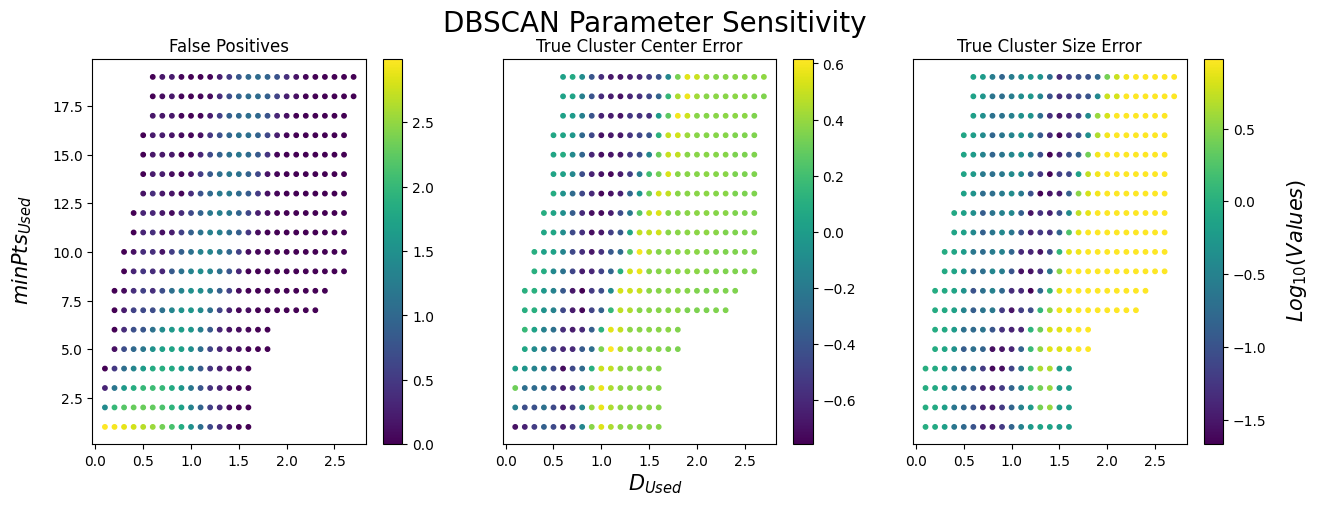

In [177]:
#focus on the verbose_result_collection 
D_minp_combination = {}
for i in verbose_result_collection:
    if i != np.nan:
        print(i)
        for j,k in i.items():
            if j not in D_minp_combination.keys():
                D_minp_combination[j] = [k]

#now lets make a dictionary with the D_minp_combination as the key and the number of clusters as the value
D_minp_combination_num_clusters = {}
D_minp_combination_cluster_center_error = {}
D_minp_combination_cluster_scale_error = {}
for i in verbose_result_collection:
    if i != np.nan:
        for j,k in i.items():
            if j not in D_minp_combination_num_clusters.keys():
                D_minp_combination_num_clusters[j] = []
                D_minp_combination_cluster_center_error[j] = []
                D_minp_combination_cluster_scale_error[j] = []
            else:
                D_minp_combination_num_clusters[j].append(k["num_clusters"])
                D_minp_combination_cluster_center_error[j].append(k["cluster_center_error"])
                D_minp_combination_cluster_scale_error[j].append(k["cluster_scale_error"])

#now we can plot this on a 2D plot where the x axis is D and the y axis is minPts and each point is the number of clusters gotten by np.nanmean(D_minp_combination_num_clusters[j])

fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 3)

#add the first plot for the number of clusters
ax1 = fig.add_subplot(gs[0, 0])
ax1_plot = ax1.scatter([key[0] for key in D_minp_combination_num_clusters.keys()],[key[1] for key in D_minp_combination_num_clusters.keys()],c=np.log10(np.array([np.nanmean(value) for value in D_minp_combination_num_clusters.values()])-1),s=10)
fig.colorbar(ax1_plot)
ax1.set_title("False Positives")


#add the second plot for the cluster center error
ax2 = fig.add_subplot(gs[0, 1])
ax2_plot = ax2.scatter([key[0] for key in D_minp_combination_cluster_center_error.keys()],[key[1] for key in D_minp_combination_cluster_center_error.keys()],c=np.log10(np.array([np.nanmean(value) for value in D_minp_combination_cluster_center_error.values()])),s=10)
fig.colorbar(ax2_plot)
ax2.set_title("True Cluster Center Error")


#add the third plot for the cluster scale error
ax3 = fig.add_subplot(gs[0, 2])
ax3_plot = ax3.scatter([key[0] for key in D_minp_combination_cluster_scale_error.keys()],[key[1] for key in D_minp_combination_cluster_scale_error.keys()],c=np.log10(np.array([np.nanmean(value) for value in D_minp_combination_cluster_scale_error.values()])),s=10)
fig.colorbar(ax3_plot)
ax3.set_title("True Cluster Size Error")


#for all x axis have the same label and for all y axis have the same label
#make only one xlabel for all three plots
fig.text(0.5, 0.02, r'$D_{Used}$', ha='center',fontsize=15)
#make only one ylabel for all three plots
fig.text(0.07, 0.5, r'$minPts_{Used}$', va='center', rotation='vertical',fontsize=15)

#for each colorbar make a label (Log10)
fig.text(0.92, 0.5, r'$Log_{10}(Values)$', va='center', rotation='vertical',fontsize=15)

#make the title of the figure as DBSCAN Parameter Sensitivity
fig.suptitle("DBSCAN Parameter Sensitivity",fontsize=20)
#remove the y ticks on the second and third plot
ax2.set_yticks([])
ax3.set_yticks([])



SAVE = False

if SAVE == True:
    #save the figure as .eps in /Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3 with the name "Range_Optimal_DBSCAN_Scale_Space.eps"
    fig.savefig("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/DBSCAN_D_minPts_combinations.svg",format="svg",dpi=200)



/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_30404/3087469852.py:17: RuntimeWarning: divide by zero encountered in log10
  ax1_plot_2 = ax1_2.plot(np.log10(threshold_range),np.log10(np.array(scale_space_false_positives)),color="red",label="False Positives",marker="o",alpha =0.4)


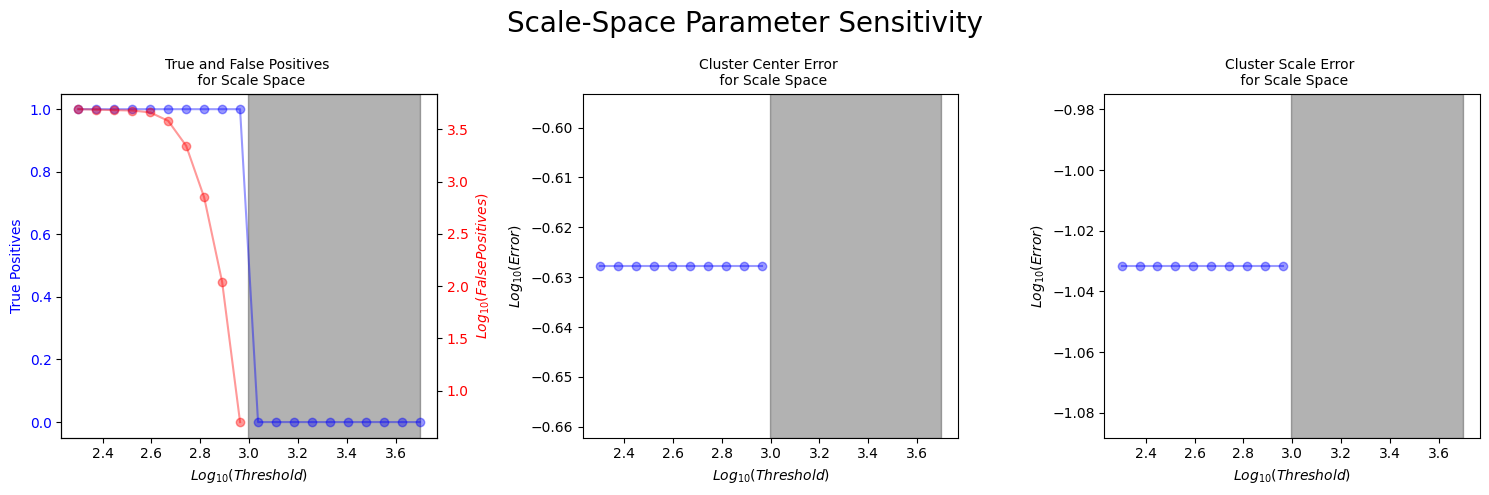

In [223]:
#now lets do this sensitivity for the Scale space data 
#use scale_space_true_positives and the scale_space_cluster_center_error and scale_space_cluster_scale_error
#threshold_range 

fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 3)

#add the first plot for the number of clusters
ax1 = fig.add_subplot(gs[0, 0])
#this plot has two y axis so we need to make two plots
ax1_plot_1 = ax1.plot(np.log10(threshold_range),np.array(scale_space_true_positives),color="blue",label="True Positives",marker="o",alpha =0.4)
ax1.set_xlabel(r"$Log_{10}(Threshold)$")
ax1.set_ylabel("True Positives",color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax1_2 = ax1.twinx()
ax1_plot_2 = ax1_2.plot(np.log10(threshold_range),np.log10(np.array(scale_space_false_positives)),color="red",label="False Positives",marker="o",alpha =0.4)
ax1_2.set_ylabel(r"$Log_{10}(False Positives)$",color="red")
ax1_2.tick_params(axis='y', labelcolor="red")
#title is True and False Positives for Scale Space
ax1.set_title("True and False Positives \n for Scale Space",fontsize=10)

#add the second plot for the cluster center error
ax2 = fig.add_subplot(gs[0, 1])
ax2_plot = ax2.plot(np.log10(threshold_range),np.log10(np.array(scale_space_cluster_center_error)),color="blue",label="Cluster Center Error",marker="o",alpha =0.4)
ax2.set_xlabel(r"$Log_{10}(Threshold)$")
ax2.set_ylabel(r"$Log_{10}(Error)$")
ax2.set_title("Cluster Center Error \n for Scale Space",fontsize=10)
#make the x lim the same as plot 1
ax2.set_xlim(ax1.get_xlim())

#add the third plot for the cluster scale error
ax3 = fig.add_subplot(gs[0, 2])
ax3_plot = ax3.plot(np.log10(threshold_range),np.log10(np.array(scale_space_cluster_scale_error)),color="blue",label="Cluster Scale Error",marker="o",alpha =0.4)
ax3.set_xlabel(r"$Log_{10}(Threshold)$")
ax3.set_ylabel(r"$Log_{10}(Error)$")
ax3.set_title("Cluster Scale Error \n for Scale Space",fontsize=10)
#make the x lim the same as plot 1
ax3.set_xlim(ax1.get_xlim())

#make the title of the figure as Scale-Space Parameter Sensitivity
fig.suptitle("Scale-Space Parameter Sensitivity",fontsize=20)
plt.tight_layout()

#make a colored region at the point where no clusters are detected, make the region crossed out rather than uniform color
ax1.axvspan(np.log10(threshold_range[10])-0.04, np.log10(threshold_range[19]), alpha=0.3, color='k')
#same for the other two plots
ax2.axvspan(np.log10(threshold_range[10])-0.04, np.log10(threshold_range[19]), alpha=0.3, color='k')
ax3.axvspan(np.log10(threshold_range[10])-0.04, np.log10(threshold_range[19]), alpha=0.3, color='k')


SAVE = False

if SAVE == True:
    #save the figure as .eps in /Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3 with the name "Range_Optimal_DBSCAN_Scale_Space.eps"
    fig.savefig("/Users/baljyot/Documents/2022-2023/PhD_Thesis/Figures/Chapter_3/Figure_3/Scale_Space_threshold_sensitivity.svg",format="svg",dpi=200)
